In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)

## Handling Missing Data

In [2]:
df = pd.read_csv('../data/raw/t20i_Matches_Data.csv')

In [3]:
display(df.head())

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [4]:
print(list(df.columns))

['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name', 'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain', 'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec', 'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored', 'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)', 'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2', 'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner', 'Match Result Text', 'MOM Player', 'Team1 Playing 11', 'Team2 Playing 11', 'Debut Players']


In [5]:
#. Remove the irrelevant columns

df= df.drop(['MOM Player','Match Result Text','T20I Match No','Match ID','Series ID','Series Name','Match Format','Team1 ID','Team2 ID','Team1 Captain','Team2 Captain','Umpire 1','Umpire 2','Match Referee','Team1 Playing 11','Team2 Playing 11','Debut Players','Match Name','Team2 Extras Rec','Team1 Extras Rec','Match Date'],axis=1)
df.head(5)

,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner
0,India,74.0,10.0,Australia,75.0,1.0,Melbourne Cricket Ground,Melbourne,Australia,India,bat,Australia
1,England,193.0,8.0,New Zealand,143.0,8.0,Jade Stadium,Christchurch,New Zealand,England,bat,England
2,Scotland,107.0,8.0,Netherlands,110.0,5.0,Civil Service Cricket Club,Belfast,Ireland,Netherlands,bowl,Netherlands
3,Kenya,106.0,9.0,Scotland,107.0,1.0,Civil Service Cricket Club,Belfast,Ireland,Kenya,bat,Scotland
4,Zimbabwe,106.0,8.0,Sri Lanka,107.0,5.0,Maple Leaf North-West Ground,King City,Canada,Sri Lanka,bowl,Sri Lanka


In [6]:
#print number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 12)


In [7]:
#remove the rows that have been duplicate values
df = df.drop_duplicates()
df.head(5)


,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner
0,India,74.0,10.0,Australia,75.0,1.0,Melbourne Cricket Ground,Melbourne,Australia,India,bat,Australia
1,England,193.0,8.0,New Zealand,143.0,8.0,Jade Stadium,Christchurch,New Zealand,England,bat,England
2,Scotland,107.0,8.0,Netherlands,110.0,5.0,Civil Service Cricket Club,Belfast,Ireland,Netherlands,bowl,Netherlands
3,Kenya,106.0,9.0,Scotland,107.0,1.0,Civil Service Cricket Club,Belfast,Ireland,Kenya,bat,Scotland
4,Zimbabwe,106.0,8.0,Sri Lanka,107.0,5.0,Maple Leaf North-West Ground,King City,Canada,Sri Lanka,bowl,Sri Lanka


In [8]:
#count the row after removing duplicate data
df.count()

Team1 Name               2592
Team1 Runs Scored        2579
Team1 Wickets Fell       2579
Team2 Name               2592
Team2 Runs Scored        2542
Team2 Wickets Fell       2542
Match Venue (Stadium)    2592
Match Venue (City)       2592
Match Venue (Country)    2592
Toss Winner              2591
Toss Winner Choice       2582
Match Winner             2494
dtype: int64

In [9]:
#Count missing values per column
print(df.isnull().sum())

Team1 Name                0
Team1 Runs Scored        13
Team1 Wickets Fell       13
Team2 Name                0
Team2 Runs Scored        50
Team2 Wickets Fell       50
Match Venue (Stadium)     0
Match Venue (City)        0
Match Venue (Country)     0
Toss Winner               1
Toss Winner Choice       10
Match Winner             98
dtype: int64


In [10]:
df = df.dropna(subset=['Toss Winner'])

In [11]:
#Count missing values per column
print(df.isnull().sum())

Team1 Name                0
Team1 Runs Scored        13
Team1 Wickets Fell       13
Team2 Name                0
Team2 Runs Scored        50
Team2 Wickets Fell       50
Match Venue (Stadium)     0
Match Venue (City)        0
Match Venue (Country)     0
Toss Winner               0
Toss Winner Choice       10
Match Winner             98
dtype: int64


In [12]:
# Calculate the mean
mean_team1_runs = df['Team1 Runs Scored'].mean()
print("Mean of Team1 Runs Scored:", mean_team1_runs)

# Fill missing values safely
df['Team1 Runs Scored'] = df['Team1 Runs Scored'].fillna(mean_team1_runs)

Mean of Team1 Runs Scored: 147.73157486423585


In [13]:
# Calculate the mean
mean_team2_runs = df['Team2 Runs Scored'].mean()
print("Mean of Team2 Runs Scored:", mean_team2_runs)

# Fill missing values safely
df['Team2 Runs Scored'] = df['Team2 Runs Scored'].fillna(mean_team2_runs)

Mean of Team2 Runs Scored: 126.54820936639119


In [14]:
# Calculate the mean
mean_team1_wickets = df['Team1 Wickets Fell'].mean()
print("Mean of Team1 Wickets Fell",mean_team1_wickets)

# Fill missing values safely
df['Team1 Wickets Fell'] = df['Team1 Wickets Fell'].fillna(mean_team1_wickets)

Mean of Team1 Wickets Fell 6.847168347556245


In [15]:
# Calculate the mean
mean_team2_wickets = df['Team2 Wickets Fell'].mean()
print("Mean of Team2 Wickets Fell:",mean_team2_wickets)

# Fill missing values safely
df['Team2 Wickets Fell'] = df['Team2 Wickets Fell'].fillna(mean_team2_wickets)

Mean of Team2 Wickets Fell: 6.035812672176308


In [16]:
#Count missing values per column
print(df.isnull().sum())

Team1 Name                0
Team1 Runs Scored         0
Team1 Wickets Fell        0
Team2 Name                0
Team2 Runs Scored         0
Team2 Wickets Fell        0
Match Venue (Stadium)     0
Match Venue (City)        0
Match Venue (Country)     0
Toss Winner               0
Toss Winner Choice       10
Match Winner             98
dtype: int64


In [17]:
# Fill missing values
df['Toss Winner Choice'] = df['Toss Winner Choice'].fillna('match called off')
df['Match Winner'] = df['Match Winner'].fillna('no result')

# Count after replacement
new_null_toss = df['Toss Winner Choice'].isnull().sum()
new_null_match = df['Match Winner'].isnull().sum()
match_off_count = (df['Match Winner'] == 'no result').sum()

print("\nAfter replacement:")
print(f"Toss Winner Choice missing values: {new_null_toss}")
print(f"Match Winner missing values: {new_null_match}")
print(f"Total 'no result' entries in Match Winner: {match_off_count}")


After replacement:
Toss Winner Choice missing values: 0
Match Winner missing values: 0
Total 'no result' entries in Match Winner: 98


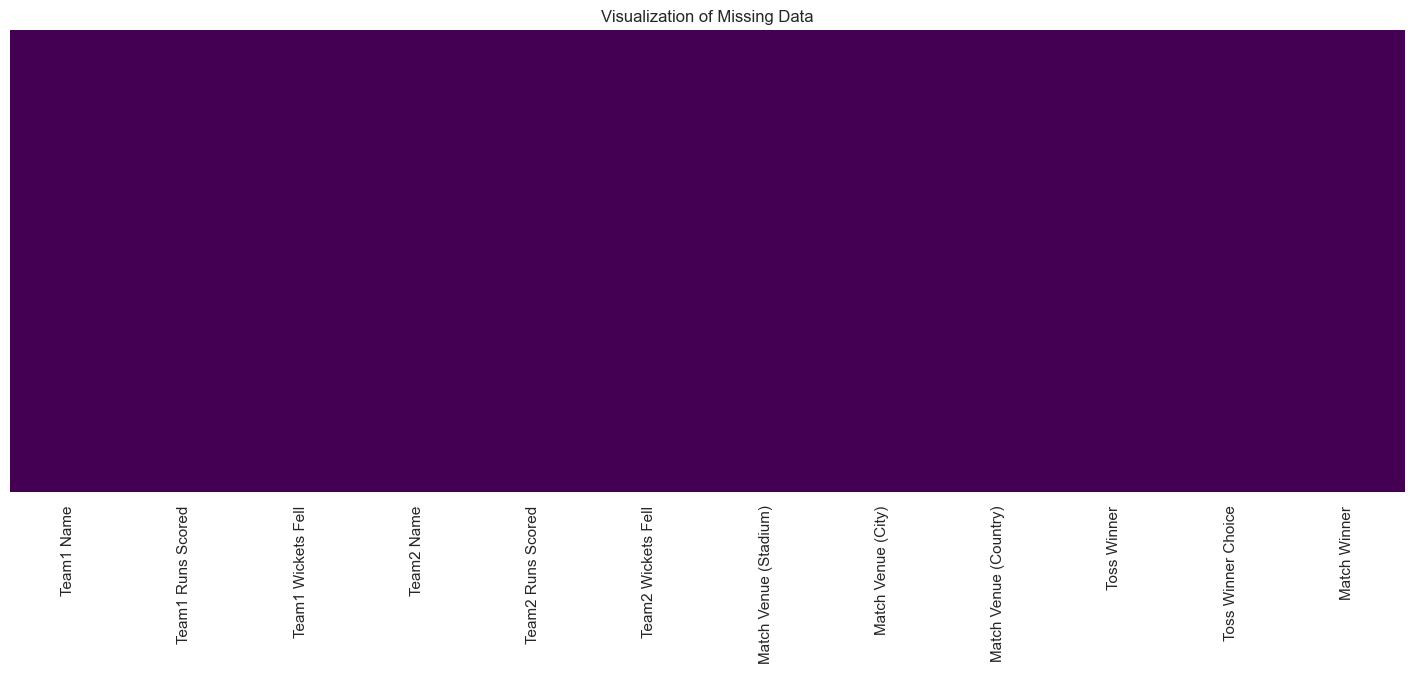

In [18]:
# Visualize missing data using a heatmap
plt.figure(figsize=(18, 6))
# A heatmap plots True (missing) values as a different color (cbar=False removes the legend)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualization of Missing Data')
plt.show()

## Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

display(df.head())

,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner
0,India,74.0,10.0,Australia,75.0,1.0,Melbourne Cricket Ground,Melbourne,Australia,India,bat,Australia
1,England,193.0,8.0,New Zealand,143.0,8.0,Jade Stadium,Christchurch,New Zealand,England,bat,England
2,Scotland,107.0,8.0,Netherlands,110.0,5.0,Civil Service Cricket Club,Belfast,Ireland,Netherlands,bowl,Netherlands
3,Kenya,106.0,9.0,Scotland,107.0,1.0,Civil Service Cricket Club,Belfast,Ireland,Kenya,bat,Scotland
4,Zimbabwe,106.0,8.0,Sri Lanka,107.0,5.0,Maple Leaf North-West Ground,King City,Canada,Sri Lanka,bowl,Sri Lanka


In [20]:
# Define categorical columns
categorical_cols = [
    'Team1 Name','Team2 Name','Match Venue (Stadium)',
    'Match Venue (City)','Match Venue (Country)',
    'Toss Winner','Match Winner'
]

In [21]:
encoders = {}
mappings = {}

# List of columns that should all share a consistent mapping
# (Team1 Name, Team2 Name, Toss Winner, Match Winner)
team_cols_for_consistency = [
    'Team1 Name', 
    'Team2 Name', 
    'Match Winner', 
    'Toss Winner'
]

# 1. Consolidate all unique team/result names from these columns
all_unique_names = pd.concat([
    df[col].astype(str) for col in team_cols_for_consistency
]).unique()

# 2. Create a single master LabelEncoder and fit it to the full list of names
master_le = LabelEncoder()
master_le.fit(all_unique_names)

# Store the master encoder and its mapping (for reference/debugging)
encoders['Team_Master_Encoder'] = master_le
master_mapping = dict(zip(master_le.classes_, master_le.transform(master_le.classes_)))

# 3. Apply the master encoding consistently to the team-related columns
for col in team_cols_for_consistency:
    # Use the pre-fitted master encoder to transform the column
    df[col] = master_le.transform(df[col].astype(str))
    
    # Store the consistent mapping under the column's name for later JSON export
    mappings[col] = master_mapping

# 4. Apply standard separate Label Encoding for any remaining categorical columns
# (e.g., Match Venue, Match Venue (City), etc. from your original categorical_cols list)
other_categorical_cols = [col for col in categorical_cols if col not in team_cols_for_consistency]

for col in other_categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [22]:
# If you want all mappings printed:
for col, mapping in mappings.items():
    print(f"\n{col} Mapping:")
    print(mapping)


Team1 Name Mapping:
{'Afghanistan': np.int64(0), 'Argentina': np.int64(1), 'Australia': np.int64(2), 'Austria': np.int64(3), 'Bahamas': np.int64(4), 'Bahrain': np.int64(5), 'Bangladesh': np.int64(6), 'Belgium': np.int64(7), 'Belize': np.int64(8), 'Bermuda': np.int64(9), 'Bhutan': np.int64(10), 'Botswana': np.int64(11), 'Brazil': np.int64(12), 'Bulgaria': np.int64(13), 'Cambodia': np.int64(14), 'Cameroon': np.int64(15), 'Canada': np.int64(16), 'Cayman Is': np.int64(17), 'Chile': np.int64(18), 'China': np.int64(19), 'Cook Islands': np.int64(20), 'Costa Rica': np.int64(21), 'Croatia': np.int64(22), 'Cyprus': np.int64(23), 'Czech Rep.': np.int64(24), 'Denmark': np.int64(25), 'England': np.int64(26), 'Estonia': np.int64(27), 'Eswatini': np.int64(28), 'Fiji': np.int64(29), 'Finland': np.int64(30), 'France': np.int64(31), 'Gambia': np.int64(32), 'Germany': np.int64(33), 'Ghana': np.int64(34), 'Gibraltar': np.int64(35), 'Greece': np.int64(36), 'Guernsey': np.int64(37), 'Hong Kong': np.int64(3

In [23]:
display(df.head())

,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner
0,41,74.0,10.0,2,75.0,1.0,118,111,1,41,bat,2
1,26,193.0,8.0,66,143.0,8.0,83,40,41,26,bat,26
2,81,107.0,8.0,65,110.0,5.0,32,15,28,65,bowl,65
3,50,106.0,9.0,81,107.0,1.0,32,15,28,50,bat,81
4,104,106.0,8.0,90,107.0,5.0,113,92,8,90,bowl,90


In [24]:
# One-Hot Encode Toss Winner Choice
df = pd.get_dummies(df, columns=['Toss Winner Choice'], drop_first=False)

# Save mapping for Toss Winner Choice (manually from the columns)
mappings['Toss Winner Choice'] = list(df.filter(like='Toss Winner Choice_').columns)

In [25]:
# --- Display Results ---

# Show first few rows
print(df.head())

# Print mappings
for col, mapping in mappings.items():
    print(f"\n{col} Mapping:")
    print(mapping)


   Team1 Name  Team1 Runs Scored  Team1 Wickets Fell  Team2 Name  \
0          41               74.0                10.0           2   
1          26              193.0                 8.0          66   
2          81              107.0                 8.0          65   
3          50              106.0                 9.0          81   
4         104              106.0                 8.0          90   

   Team2 Runs Scored  Team2 Wickets Fell  Match Venue (Stadium)  \
0               75.0                 1.0                    118   
1              143.0                 8.0                     83   
2              110.0                 5.0                     32   
3              107.0                 1.0                     32   
4              107.0                 5.0                    113   

   Match Venue (City)  Match Venue (Country)  Toss Winner  Match Winner  \
0                 111                      1           41             2   
1                  40                 


Visualizing One-Hot Encoded Toss Choice Columns...


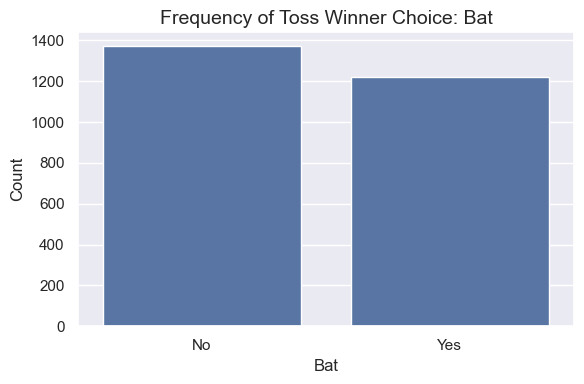

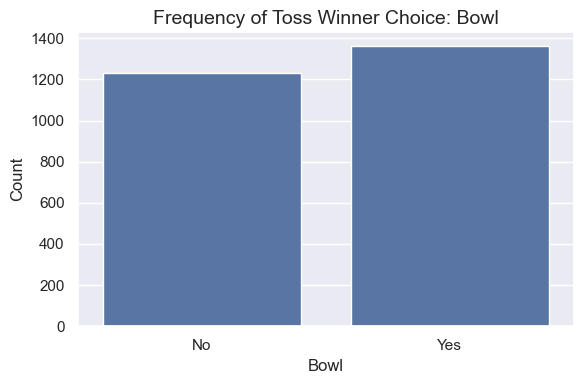

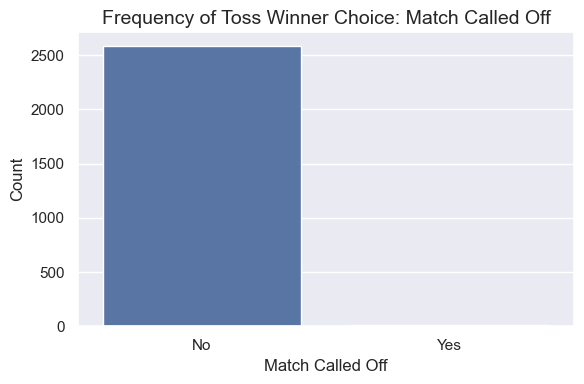

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Perform One-Hot Encoding (The step that was missing)
# -----------------------------

# NOTE: You must use the actual column name from your raw data 
# that contains the values 'bat', 'bowl', 'match called off', etc.
# We will assume this column is called 'Toss Winner Choice'.

if 'Toss Winner Choice' in df.columns:
    # Use get_dummies to create the one-hot encoded columns (e.g., Toss Winner Choice_bat)
    # The prefix ensures the new columns match the names you requested for visualization.
    df = pd.get_dummies(df, columns=['Toss Winner Choice'], prefix='Toss Winner Choice')
    print("✅ One-Hot Encoding applied successfully. New columns created.")


# -----------------------------
# 2. Visualization (Your original request, now runnable)
# -----------------------------

ENCODED_COLS_TO_VISUALIZE = [
    'Toss Winner Choice_bat', 
    'Toss Winner Choice_bowl', 
    'Toss Winner Choice_match called off'
]

print("\nVisualizing One-Hot Encoded Toss Choice Columns...")

for col in ENCODED_COLS_TO_VISUALIZE:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        
        # Countplot is ideal for visualizing the frequency of 0s and 1s
        sns.countplot(x=df[col])
        
        # Customize labels and title
        # Replace 'Toss Winner Choice_' for cleaner plot titles
        clean_title = col.replace('Toss Winner Choice_', '').title()
        
        plt.title(f'Frequency of Toss Winner Choice: {clean_title}', fontsize=14)
        plt.xlabel(clean_title, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{col}' is still missing after attempting One-Hot Encoding. Check the original column names.")

In [27]:
import json

# Convert numpy.int64 -> Python int
clean_mappings = {}
for col, mapping in mappings.items():
    if isinstance(mapping, dict):
        clean_mappings[col] = {str(k): int(v) for k, v in mapping.items()}
    else:
        # For Toss Winner Choice (list of strings from One-Hot Encoding)
        clean_mappings[col] = [str(v) for v in mapping]

# Save as JSON
with open("../results/logs/categorical_mappings.json", "w") as f:
    json.dump(clean_mappings, f, indent=4)

print("Mappings saved to categorical_mappings.json ✅")

Mappings saved to categorical_mappings.json ✅


## Outlier Removal

In [28]:
# Identify numeric columns related to the match data
numeric_cols = ['Team1 Runs Scored', 'Team1 Wickets Fell', 'Team2 Runs Scored', 'Team2 Wickets Fell']

# Compute Q1, Q3, and IQR for the numerical columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
condition = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[condition]

# Check the new shape after removing outliers
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (2591, 14)
Cleaned shape: (2517, 14)


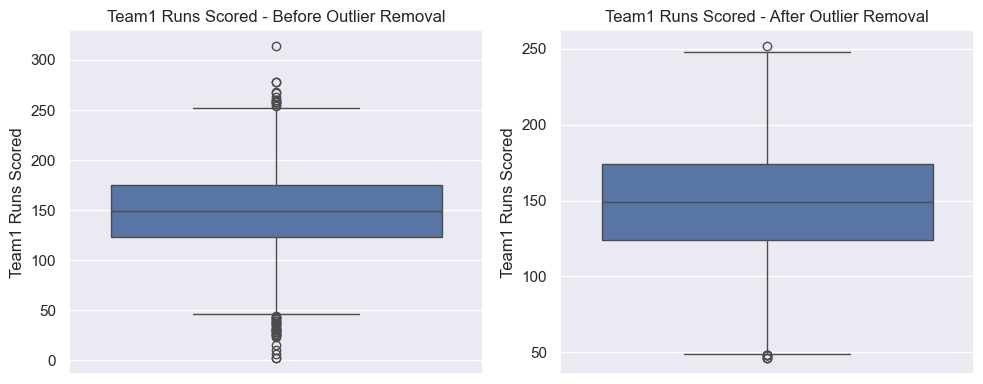

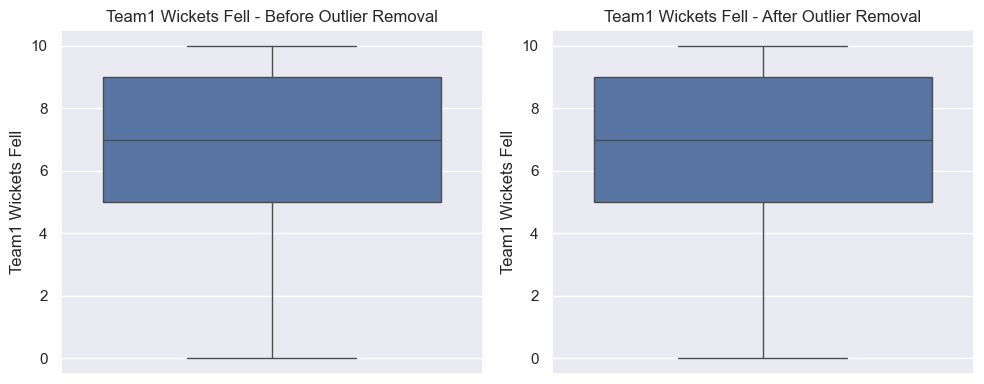

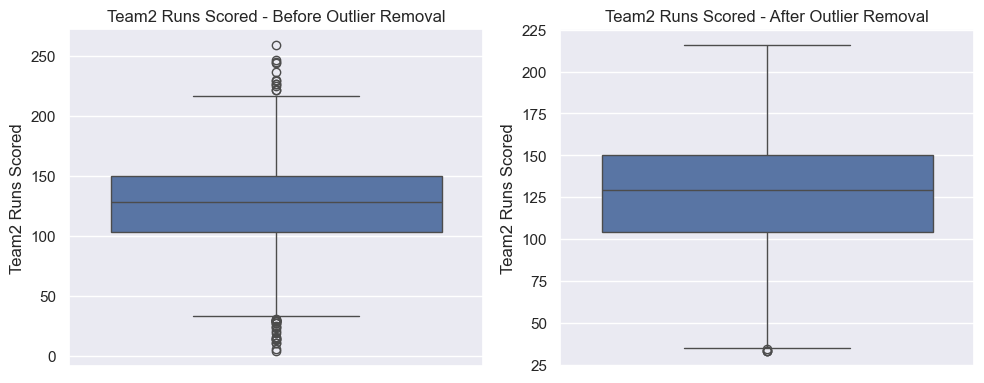

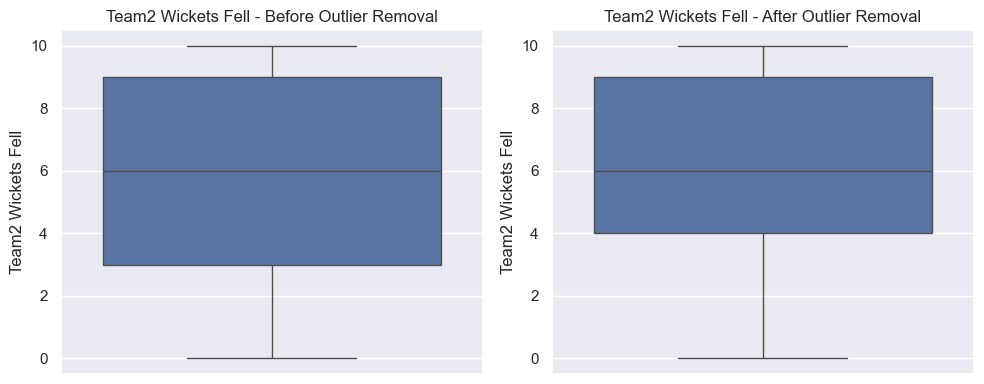

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is the DataFrame before outlier removal
# Assuming df_cleaned is the DataFrame after outlier removal

# List of the 4 specific columns you want to visualize
cols_to_visualize = [
    'Team1 Runs Scored', 
    'Team1 Wickets Fell', 
    'Team2 Runs Scored', 
    'Team2 Wickets Fell'
]

# Loop only through the specified columns
for col in cols_to_visualize:
    # Ensure the column exists in both DataFrames before plotting
    if col in df.columns and col in df_cleaned.columns:
        plt.figure(figsize=(10, 4))
    
        # Plot 1: Before Outlier Removal
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df[col])
        plt.title(f'{col} - Before Outlier Removal')
        
        # Plot 2: After Outlier Removal
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_cleaned[col])
        plt.title(f'{col} - After Outlier Removal')
    
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in one or both DataFrames. Skipping visualization.")



## Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select only the columns you want to scale
cols_to_scale = [
    "Team1 Runs Scored",
    "Team1 Wickets Fell",
    "Team2 Runs Scored",
    "Team2 Wickets Fell"
]

In [31]:
# Apply Min-Max scaling (0–1 range)
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

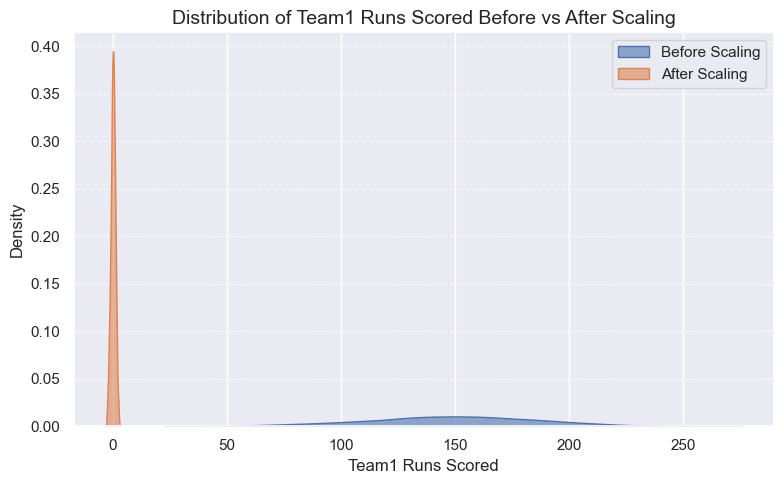

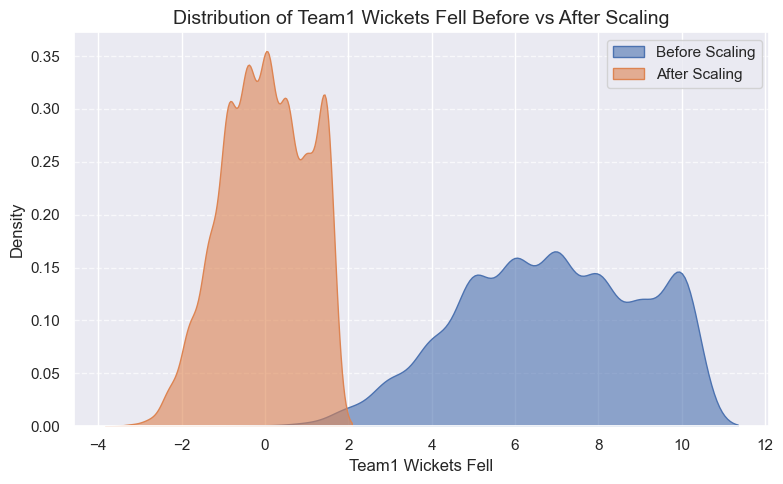

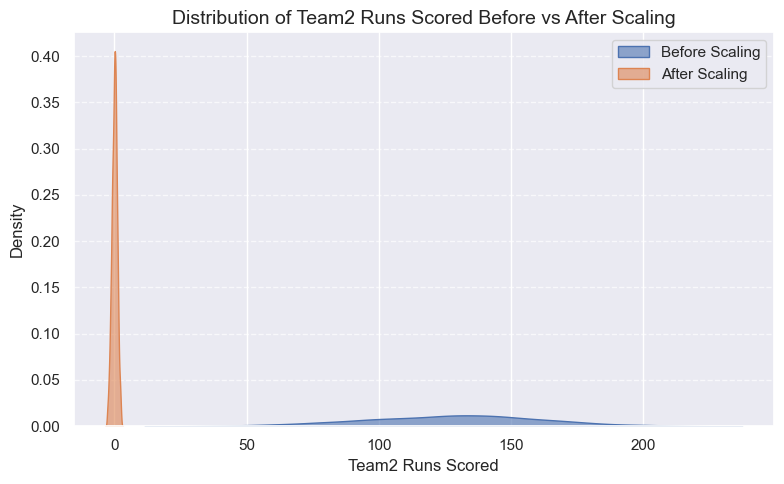

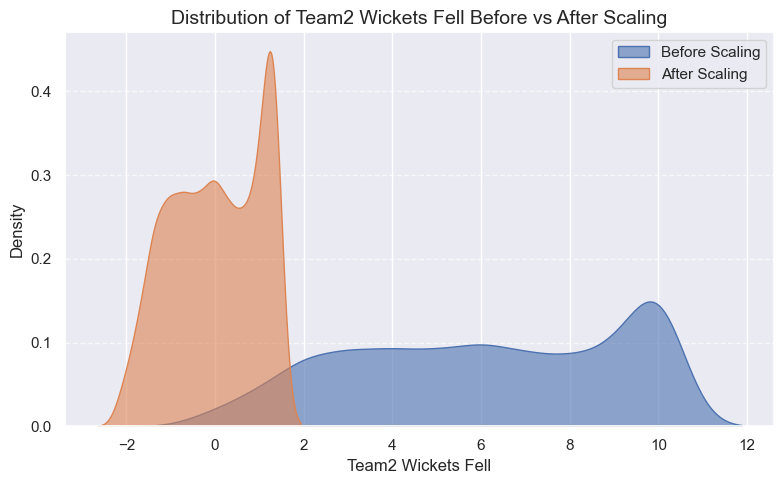

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_cleaned.copy()

# Identify numeric columns for scaling
numeric_cols_to_scale = df_cleaned.select_dtypes(include=['int64','float64']).columns

# Apply scaling
df_scaled[numeric_cols_to_scale] = scaler.fit_transform(
    df_cleaned[numeric_cols_to_scale]
)

# List of the 4 specific columns you want to visualize
cols_to_visualize = [
    "Team1 Runs Scored",
    "Team1 Wickets Fell",
    "Team2 Runs Scored",
    "Team2 Wickets Fell"
]

# Loop only through the specified columns
for col in cols_to_visualize:
    plt.figure(figsize=(8, 5))
    
    # Check if the column exists in the DataFrame before plotting
    if col in df_cleaned.columns and col in df_scaled.columns:
        sns.kdeplot(df_cleaned[col], label='Before Scaling', fill=True, alpha=0.6)
        sns.kdeplot(df_scaled[col], label='After Scaling', fill=True, alpha=0.6)
        plt.title(f'Distribution of {col} Before vs After Scaling', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping visualization for this column.")

## Feature Engineering

   Team1 Name  Team1 Runs Scored  Team1 Wickets Fell  Team2 Name  \
0          41           0.230769                 1.0           2   
1          26           0.612179                 0.8          66   
2          81           0.336538                 0.8          65   
3          50           0.333333                 0.9          81   
4         104           0.333333                 0.8          90   

   Team2 Runs Scored  Team2 Wickets Fell  Match Venue (Stadium)  \
0           0.278431                 0.1                    118   
1           0.545098                 0.8                     83   
2           0.415686                 0.5                     32   
3           0.403922                 0.1                     32   
4           0.403922                 0.5                    113   

   Match Venue (City)  Match Venue (Country)  Toss Winner  Match Winner  \
0                 111                      1           41             2   
1                  40                 

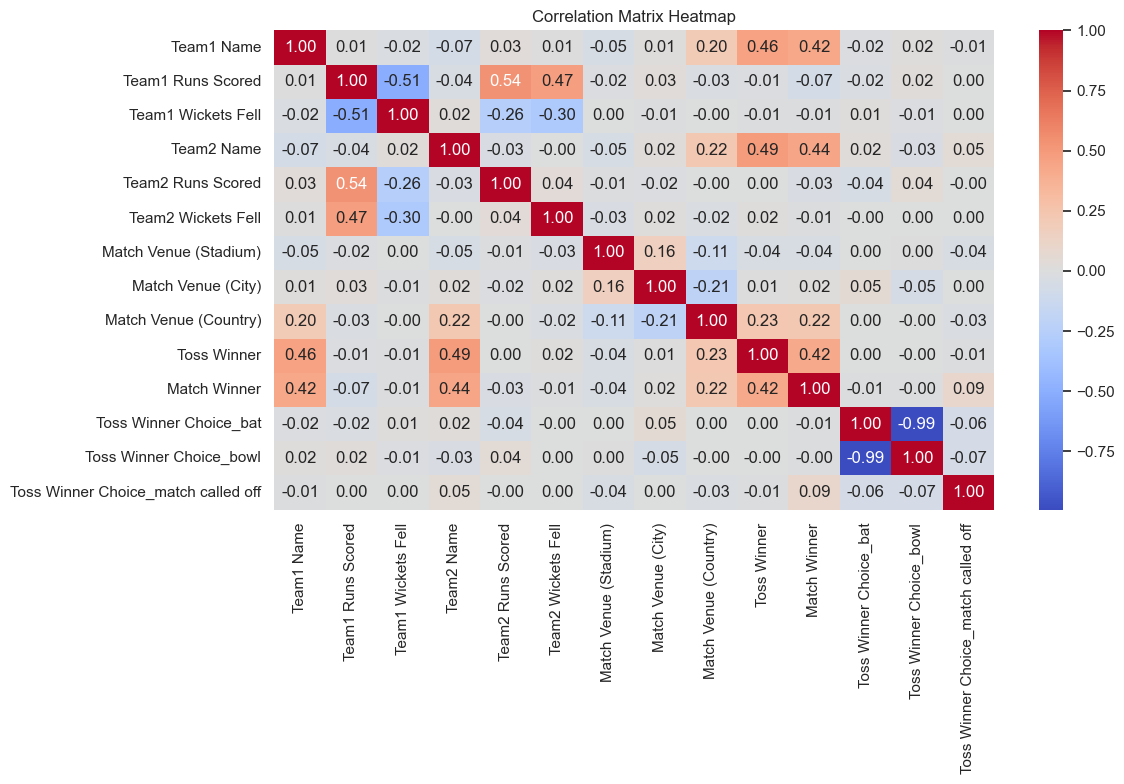

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

# Compute correlation matrix (numeric columns only)
correlation_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [34]:
# Write processed dataset back to a new file
df.to_csv('../results/outputs/t20i_Matches_Data_final.csv', index=False)
print("Pre-processed dataset saved successfully ✅")

Pre-processed dataset saved successfully ✅


Random Forest Classifier Accuracy: 0.62


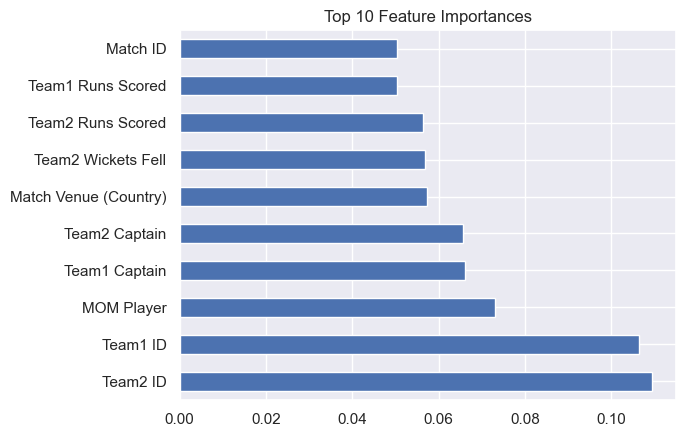

In [35]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load the dataset
data = pd.read_csv('../data/raw/t20i_Matches_Data.csv')

# 1. Preprocessing
# Drop columns with too many string values
# (like Match Name, Series Name, etc.)
drop_cols = ['Match Name', 'Series Name', 'Match Date', 'Match Format',
             'Team1 Name', 'Team2 Name', 'Toss Winner', 'Match Result Text',
             'Team1 Playing 11', 'Team2 Playing 11', 'Debut Players',
             'Umpire 1', 'Umpire 2', 'Match Referee']
data = data.drop(columns=[col for col in drop_cols if col in data.columns])

# Target variable: Match Winner
target = 'Match Winner'

# Convert categorical target to numeric
data[target] = data[target].astype('category').cat.codes

# Convert remaining object columns to categorical codes
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

# Split features and target
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2. Train Random Forest
clf = RandomForestClassifier(
    n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 3. Evaluate Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

# (Optional) Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [36]:
df = pd.read_csv('../data/raw/t20i_Matches_Data.csv')
print(df.columns.tolist())

['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name', 'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain', 'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec', 'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored', 'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)', 'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2', 'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner', 'Match Result Text', 'MOM Player', 'Team1 Playing 11', 'Team2 Playing 11', 'Debut Players']


Shape: (2592, 33)
   T20I Match No  Match ID                              Match Name  Series ID  \
0             52    291356            Australia Vs India Only T20I     291355   
1             54    300436         New Zealand Vs England 2Nd T20I     300418   
2             65    361531  Netherlands Vs Scotland 2Nd Semi Final     353665   
3             66    354459     Kenya Vs Scotland 3Rd Place Playoff     353665   
4             69    361653         Sri Lanka Vs Zimbabwe 1St Match     361644   

                                         Series Name  Match Date Match Format  \
0          India tour of Australia  - 2007 (2007/08)  2008-02-01          T20   
1      England tour of New Zealand  - 2008 (2007/08)  2008-02-07          T20   
2  ICC World Twenty20 Qualifier Bermuda, Canada, ...  2008-08-04          T20   
3  ICC World Twenty20 Qualifier Bermuda, Canada, ...  2008-08-04          T20   
4              T20 Canada in Canada - 2008 (2008/09)  2008-10-10          T20   

   Team1

C:\Users\upekk\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\upekk\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\upekk\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


🎲 Toss Choice Prediction Accuracy: 0.562862669245648
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       249
           1       0.57      0.61      0.59       268

    accuracy                           0.56       517
   macro avg       0.56      0.56      0.56       517
weighted avg       0.56      0.56      0.56       517



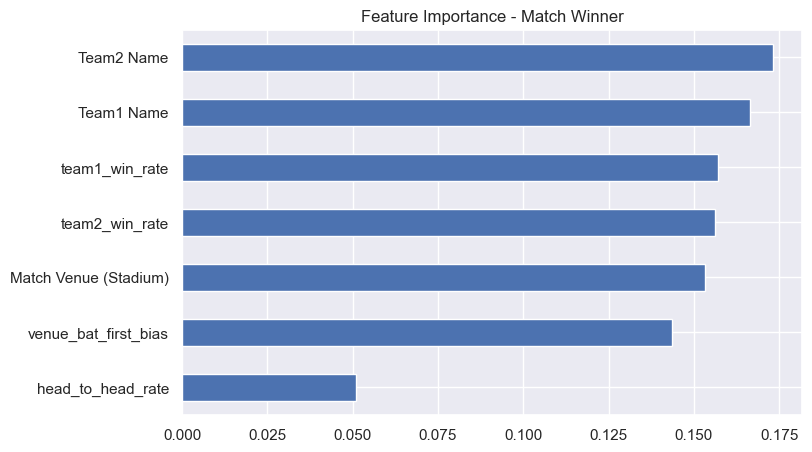

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv('../data/raw/t20i_Matches_Data.csv')

print("Shape:", df.shape)
print(df.head())

# -----------------------------
# 2. Basic Preprocessing (FIXED)
# -----------------------------
# Use the correct column names, including "Toss Winner Choice"
cat_cols = ["Team1 Name", "Team2 Name", "Match Venue (Stadium)", 
            "Toss Winner", "Match Winner", "Toss Winner Choice"] # <-- 'Toss Winner Choice' added

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    # Ensure all categorical columns, including 'Toss Winner Choice', are encoded
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Map the Label Encoded 'Toss Winner Choice' to 'Toss_Decision' (0=bat, 1=bowl).
toss_choice_encoder = encoders["Toss Winner Choice"]

def map_toss_decision(encoded_value):
    # Get the original categories
    classes = list(toss_choice_encoder.classes_)
    
    # Check if the encoded value corresponds to 'bat'
    if 'bat' in classes and encoded_value == classes.index('bat'):
        return 0  # 0 = bat
    # Check if the encoded value corresponds to 'bowl'
    elif 'bowl' in classes and encoded_value == classes.index('bowl'):
        return 1  # 1 = bowl
    else:
        return -1 # Other values (NaN, 'no result', etc.)

# Apply the mapping function to the encoded column
df["Toss_Decision"] = df["Toss Winner Choice"].apply(map_toss_decision)

# Drop the now-redundant encoded column
df.drop(columns=['Toss Winner Choice'], inplace=True) 

# Filter out rows where toss decision is invalid
df = df[df["Toss_Decision"] != -1]
# -----------------------------
# 3. Feature Engineering
# -----------------------------

# a) Team overall win rate
team_win_rate = df["Match Winner"].value_counts() / len(df)
df["team1_win_rate"] = df["Team1 Name"].map(team_win_rate).fillna(0.5)
df["team2_win_rate"] = df["Team2 Name"].map(team_win_rate).fillna(0.5)

# b) Head-to-head win rate
def head_to_head(row):
    t1, t2 = row["Team1 Name"], row["Team2 Name"]
    mask = ((df["Team1 Name"] == t1) & (df["Team2 Name"] == t2)) | \
           ((df["Team1 Name"] == t2) & (df["Team2 Name"] == t1))
    matches = df[mask]
    if len(matches) == 0:
        return 0.5
    return (matches["Match Winner"] == t1).mean()

df["head_to_head_rate"] = df.apply(head_to_head, axis=1)

# c) Venue batting bias (how often "bat first" was chosen at that venue)
venue_bat_bias = df.groupby("Match Venue (Stadium)")["Toss_Decision"].apply(lambda x: (x == 0).mean())
df["venue_bat_first_bias"] = df["Match Venue (Stadium)"].map(venue_bat_bias)

# -----------------------------
# 4. Match Winner Prediction
# -----------------------------
X_winner = df[["Team1 Name", "Team2 Name", "Match Venue (Stadium)",
               "team1_win_rate", "team2_win_rate", "head_to_head_rate", "venue_bat_first_bias"]]
y_winner = df["Match Winner"]

X_train, X_test, y_train, y_test = train_test_split(X_winner, y_winner, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\n🎯 Match Winner Prediction Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# -----------------------------
# 5. Toss Choice Prediction
# -----------------------------
X_toss = df[["Match Venue (Stadium)", "team1_win_rate", "team2_win_rate", "head_to_head_rate", "venue_bat_first_bias"]]
y_toss = df["Toss_Decision"]  # 0 = bat, 1 = bowl

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_toss, y_toss, test_size=0.2, random_state=42)

clf_toss = RandomForestClassifier(n_estimators=200, random_state=42)
clf_toss.fit(X_train_t, y_train_t)

y_pred_t = clf_toss.predict(X_test_t)

print("\n🎲 Toss Choice Prediction Accuracy:", accuracy_score(y_test_t, y_pred_t))
print(classification_report(y_test_t, y_pred_t))

# -----------------------------
# 6. Feature Importance Plot
# -----------------------------
feat_importances = pd.Series(clf.feature_importances_, index=X_winner.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance - Match Winner")
plt.show()